In [1]:
# 导包
# (1) 数据处理
import pandas as pd
import numpy as np
# 相关系数
from scipy.stats import pearsonr
# 离散数据转连续型
from sklearn.preprocessing import LabelEncoder
# 数据集划分
from sklearn.model_selection import train_test_split
# 特征值标准化
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# (2) 数据可视化
import matplotlib.pyplot as plt
import seaborn as sns

# (3) 神经网络模型库
import keras
from keras.utils import np_utils

# (4) 模型评估与训练准确性的判断
from sklearn.metrics import accuracy_score

In [2]:
# 1. 获取数据集
df = pd.read_csv('./datasets/cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


|            标签            |      说明      |
|:------------------------:|:------------:|
|           Age            |     患者年龄     |
|          Gender          |     患者性别     |
|      Air Pollution       | 患者所居住的空气污染情况 |
|       Alcohol use        |     饮酒程度     |
|       Dust Allergy       |    粉尘过敏程度    |
|   OccuPational Hazards   |    职业危害情况    |
|       Genetic Risk       |    遗传风险情况    |
|   chronic Lung Disease   |    慢性肺病情况    |
|      Balanced Diet       |    均衡饮食情况    |
|         Obesity          |     肥胖情况     |
|         Smoking          |     吸烟情况     |
|      Passive Smoker      |   被动吸烟者情况    |
|        Chest Pain        |     胸痛情况     |
|    Coughing of Blood     |     咳血情况     |
|         Fatigue          |     疲劳情况     |
|       Weight Loss        |    体重减轻情况    |
|   Shortness of Breath    |      气短      |
|         Wheezing         |      喘息      |
|  Swallowing Difficulty   |     吞咽困难     |
| Clubbing of Finger Nails |     杵状指      |
|      Frequent Cold       |     经常感冒     |
|        Dry Cough         |     干咳情况     |
|         Snoring          |     打鼾情况     |
|          Level           |    肺癌严重性     |


In [3]:
df.shape

(1000, 26)

In [4]:
# 删除无用的数据 index 、Patient Id
df.drop(columns=['index', 'Patient Id'], inplace=True)
df.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [5]:
# 检查缺失值
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
# 查看目标值
target = df['Level'].unique()
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

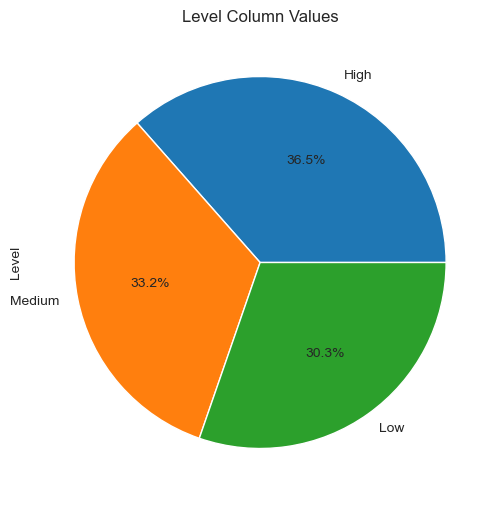

In [7]:
# 绘制目标值数据的饼图
x = df['Level'].value_counts()
plt.figure(figsize=(6,7))
plt.title('Level Column Values')
round(df['Level'].value_counts() / df.shape[0]*100,2).plot.pie(autopct='%2.1f%%')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2220\1046308420.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True, color="g")


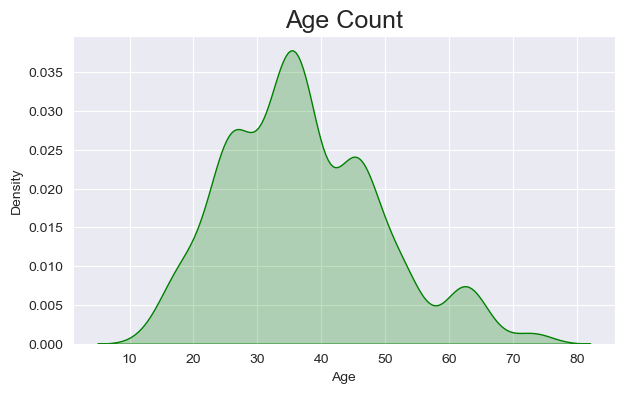

In [8]:
# 年龄分析
plt.figure(figsize=(7,4))
sns.kdeplot(df['Age'], shade=True, color="g")
plt.title("Age Count", fontsize=18)
plt.show()

In [9]:
# 相关性分析
# 离散数据转换为连续型
df['Level'] = df['Level'].replace(['Low','Medium','High'],[0,1,2])

In [10]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [154]:
# 相关性分析
"""
factor = df.columns.array
factor = factor[2:len(factor)]

for i in range(len(factor)):
    for j in range(i,len(factor)-1):
        print(
            "指标%s与指标%s之间的相关性大小为%f" % (factor[i], factor[j+1], pearsonr(df[factor[i]], df[factor[j+1]])[0])
        )
"""

'\nfactor = df.columns.array\nfactor = factor[2:len(factor)]\n\nfor i in range(len(factor)):\n    for j in range(i,len(factor)-1):\n        print(\n            "指标%s与指标%s之间的相关性大小为%f" % (factor[i], factor[j+1], pearsonr(df[factor[i]], df[factor[j+1]])[0])\n        )\n'

<AxesSubplot: >

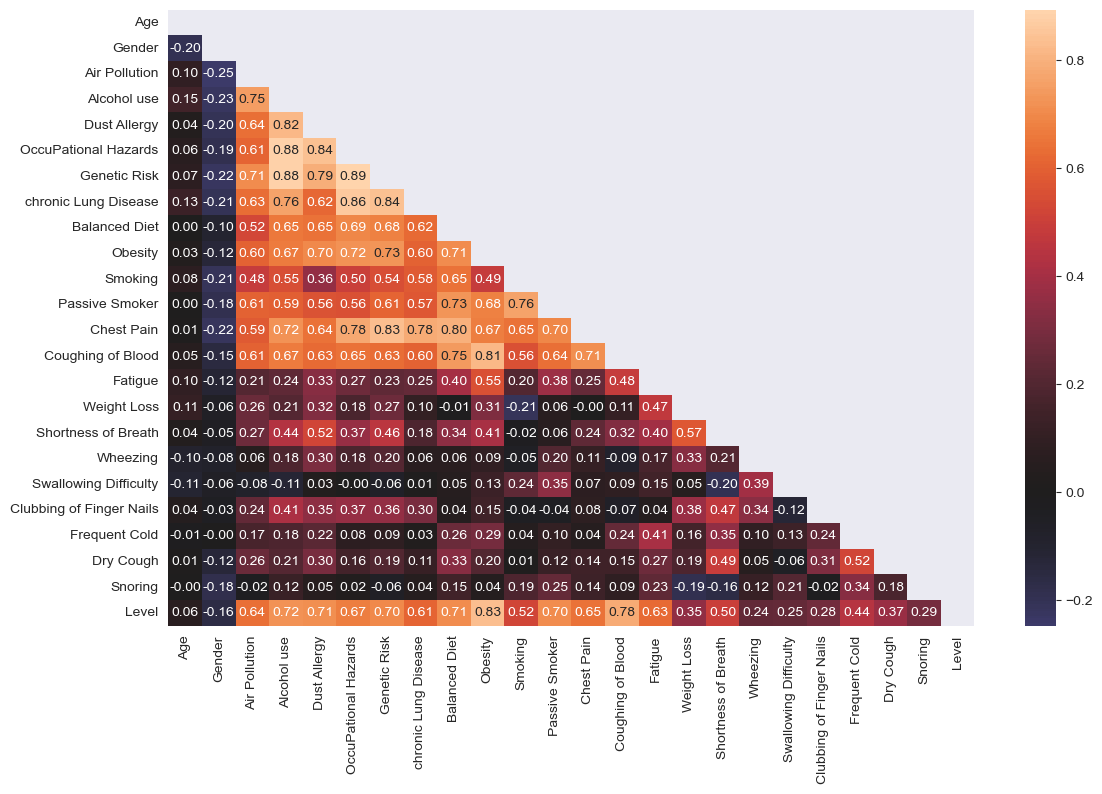

In [11]:
# 绘制相关性热力图
plt.figure(figsize=(13, 8))
#_df = df.drop(columns=['Level'],axis=1)
_df = df.copy()
# 计算特征之间的相关系数
correlation = _df.corr()
# 矩阵变换
mask = np.triu(np.ones_like(correlation,dtype=bool))
# 绘制相关性系数的热力图
sns.heatmap(correlation, annot=True, mask=mask, fmt='.2f', center=0)

> 由热力图分析可得：
> - 肺癌症状程度与：饮酒程度、粉尘过敏、家族遗传性、饮食均衡情况、肥胖、二次吸烟、咳血程度具有高度的线性相关性
> - 肺癌症状程度与：空气污染程度、职业危害程度、慢性肺病、吸烟程度、胸痛程度、疲劳程度、气喘程度、经常感冒具有显著的相关性

In [12]:
# 标签划分 ==> 不同的值，我们给赋予不同水平的含义
labels = {
    0: "extremely low",
    1: "very low",
    2: "low",
    3: "below medium average",
    4: "medium",
    5: "above medium average",
    6: "high",
    7: "very high",
    8: "extremely high",
    9: "Maximum"
}

[Text(0.5, 1.0, 'The relationship between gender and occupational hazard')]

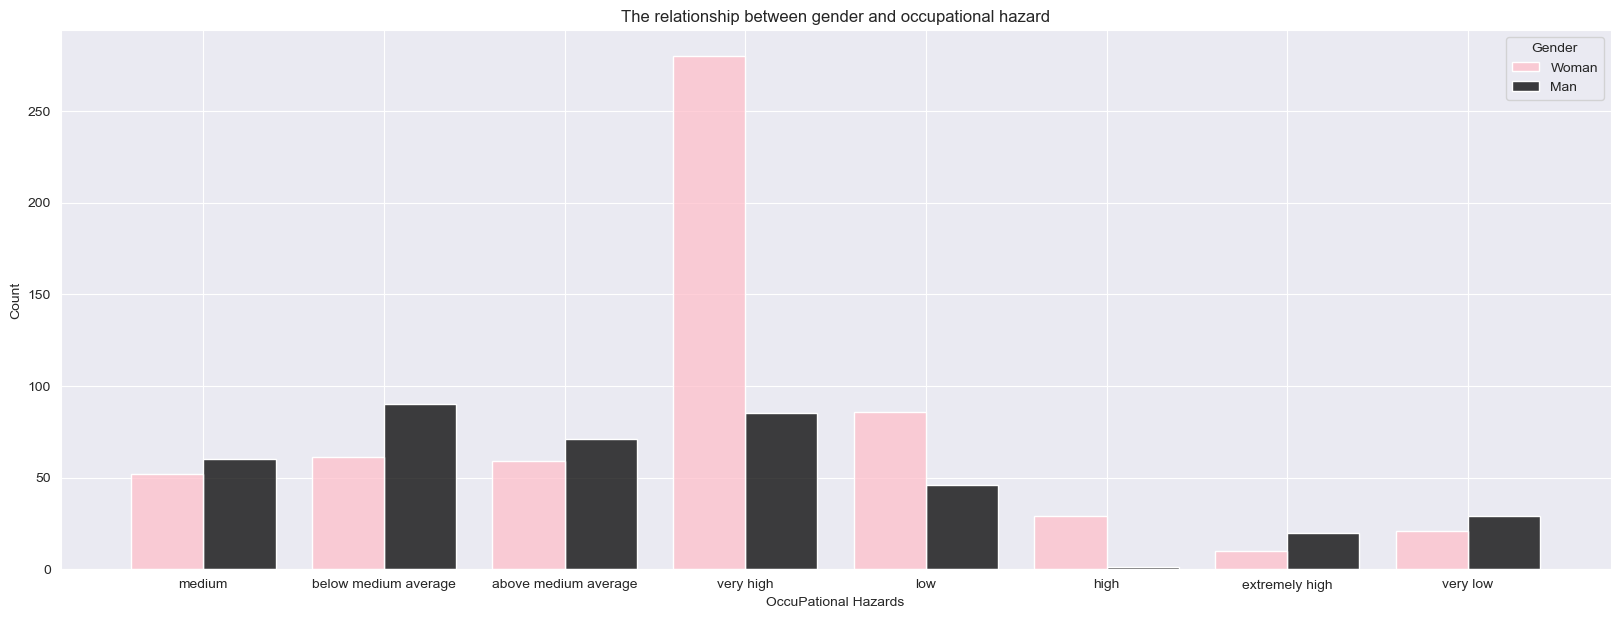

In [13]:
# 探究职业危害性与性别之间的关联
# 替换标签
_df['OccuPational Hazards'] = _df['OccuPational Hazards'].replace(
    [1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
_df['Gender'] = _df['Gender'].replace(
    [1,2],['Woman','Man']
)
plt.subplots(figsize=(20,7))
sns.histplot(data=df,x=_df['OccuPational Hazards'],hue=_df['Gender'],multiple='dodge',shrink=.8,palette=['pink','black']).set(
    title = 'The relationship between gender and occupational hazard'
)

> 由图可知：从事高危职业的女性更易患肺癌

In [14]:
# 探究吸食'二手烟'而患肺癌的情况
# 标签替换
_df['Passive Smoker'] = _df['Passive Smoker'].replace(
    [1,2,3,4,5,6,7,8],
    [labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]]
)
# 计算
_df['Passive Smoker'].value_counts()

low                     284
very high               187
medium                  161
below medium average    140
extremely high          108
very low                 60
high                     30
above medium average     30
Name: Passive Smoker, dtype: int64

<AxesSubplot: title={'center': 'Number of Passive Smokers'}, xlabel='Passive Smoker', ylabel='Count'>

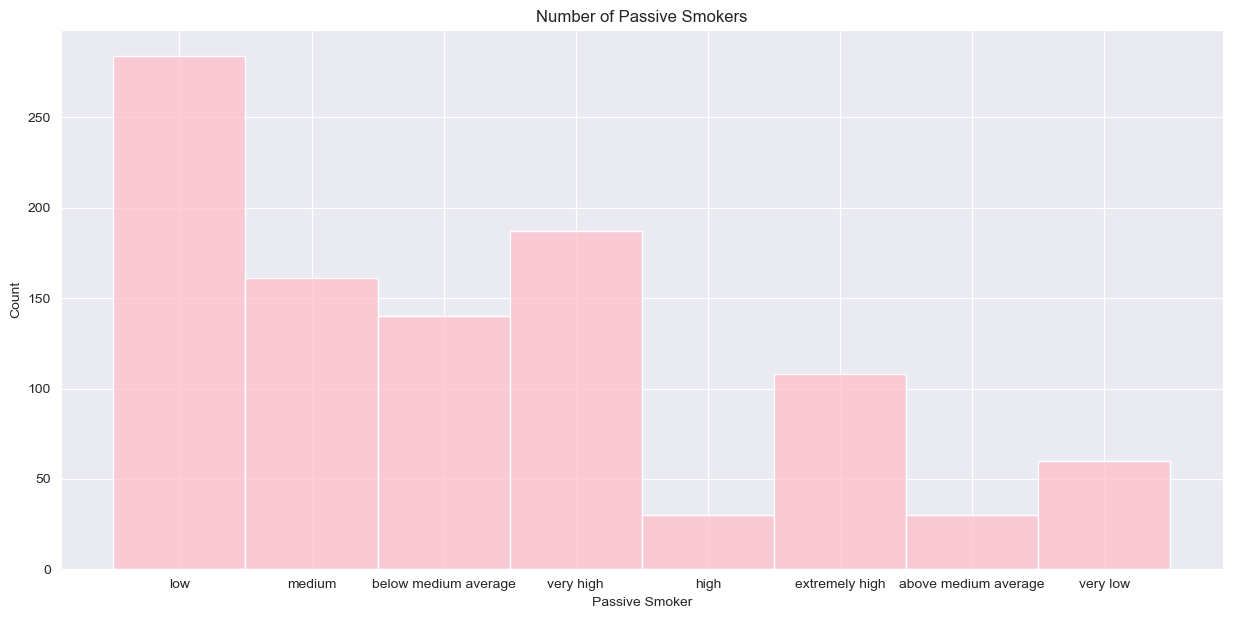

In [15]:
# 绘图
plt.subplots(figsize=(15,7))
plt.title("Number of Passive Smokers")
sns.histplot(data=_df, x=_df['Passive Smoker'],color='pink')

> 肺癌患者中，吸食'二手烟'的人数逐渐增加
> 肺癌患者中，吸食'二手烟'程度为low的人数有近300人

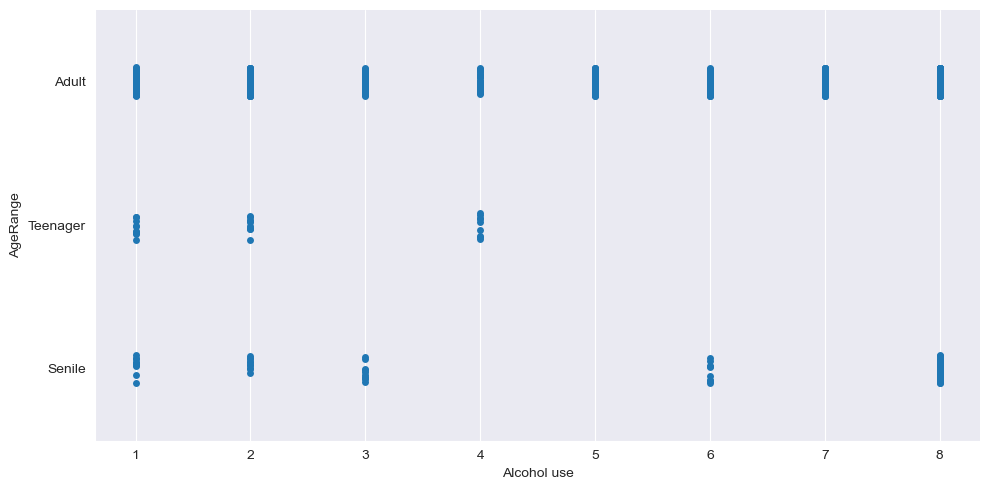

In [16]:
# 探究肺癌患者中 各年龄段的饮酒情况
# 数据集中的年龄14-73
# 划分年龄段
_df['AgeRange'] = None
# 青少年
_df.loc[(_df['Age'] >= 14) & (_df['Age'] < 18),'AgeRange'] = 'Teenager'
# 成年人
_df.loc[(_df['Age'] >= 18) & (_df['Age'] < 55),'AgeRange'] = 'Adult'
# 老年人
_df.loc[(_df['Age'] >= 55) & (_df['Age'] <= 73),'AgeRange'] = 'Senile'
sns.catplot(data=_df,x='Alcohol use',y='AgeRange',aspect=20/10,height=5)

> 肺癌患者中，饮酒最多的入群是成年人，其次是老年人，饮酒最少的入群是青年人

<AxesSubplot: xlabel='OccuPational Hazards', ylabel='Genetic Risk'>

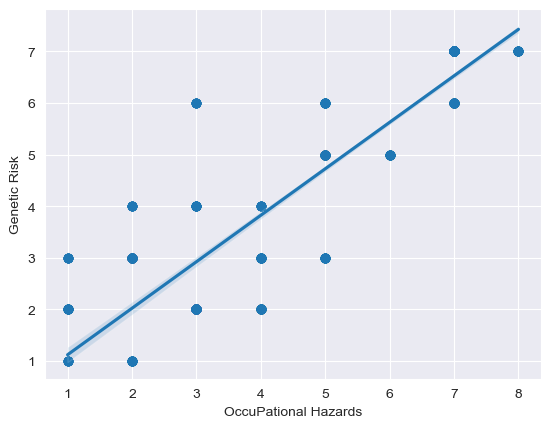

In [17]:
sns.regplot(x="OccuPational Hazards", y="Genetic Risk", data=df)

职业危害性越大，遗传风险就越大

<AxesSubplot: xlabel='Air Pollution', ylabel='Coughing of Blood'>

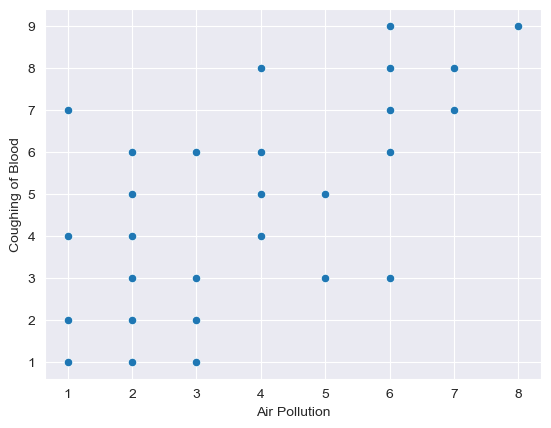

In [19]:
sns.scatterplot(data=df,x="Air Pollution", y="Coughing of Blood")

空气污染越严重，咳血程度越高

<AxesSubplot: xlabel='Obesity', ylabel='Coughing of Blood'>

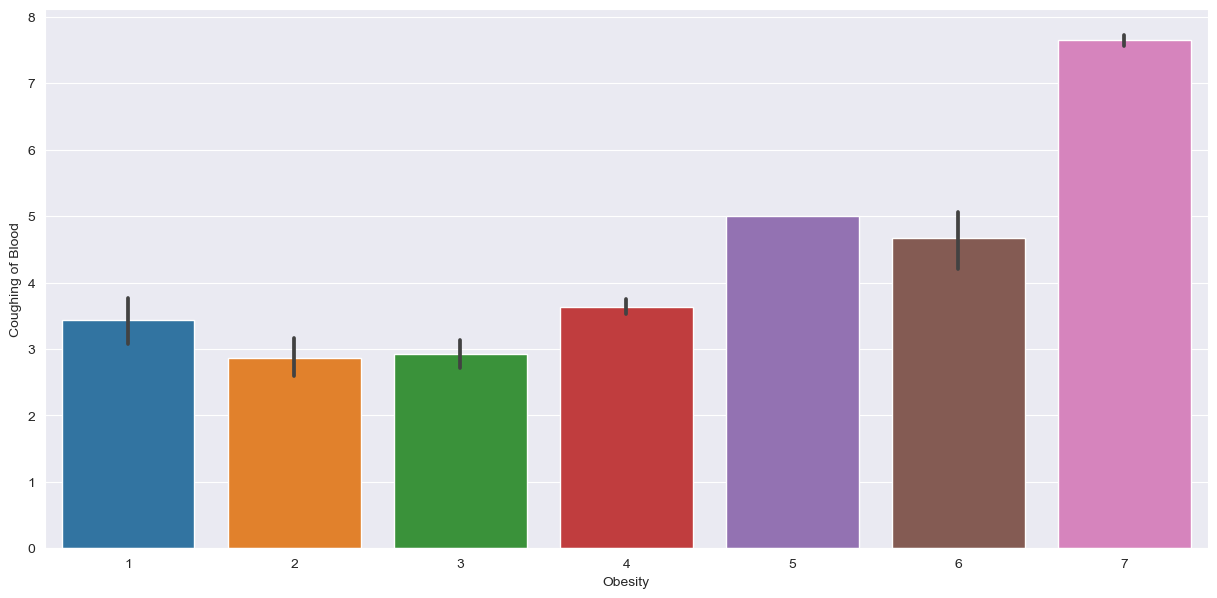

In [20]:
# 探究肥胖人群与咳血之间的关系
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Obesity',y='Coughing of Blood')

> 一定程度上，越肥胖的人，咳血越严重

## 神经网络模型

In [23]:
# 特征矩阵
x = df.drop(columns=['Level'])

In [25]:
y = df['Level']

In [126]:
# 将目标值转换为百分比矩阵
_y = np_utils.to_categorical(y)
_y.shape

(1000, 3)

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x,_y,train_size=0.7)

In [128]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1

In [129]:
transfer = StandardScaler().fit(x_train)
x_train = transfer.transform(x_train)
x_test = transfer.transform(x_test)

In [130]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Sequential顺序模型：输入层,隐藏层1,隐藏层2,...,输出层
Dense: 全连接层

In [131]:
# 创建一个神经网络模型 ---> 四层神经元(三层密集，一层下降)
model = keras.Sequential([
    # relu: 整流线性单元
    keras.layers.Dense(units = 64, activation='relu'),
    keras.layers.Dense(units = 128, activation='relu'),
    # 随机杀死0.4的神经元，防止过拟合
    keras.layers.Dropout(0.7),
    keras.layers.Dense(3, activation='softmax'),
])


In [132]:
model.compile(
    optimizer='adam', # 优化器
    loss='categorical_crossentropy', # 损失函数
    metrics=['accuracy'], # 评估标准
)

In [133]:
history = model.fit(x_train,y_train,epochs=15, validation_split=0.3)

Epoch 1/15
16/16 [==============================] - 15s 692ms/step - loss: 1.0673 - accuracy: 0.4601 - val_loss: 0.6787 - val_accuracy: 0.8341
Epoch 2/15
16/16 [==============================] - 0s 26ms/step - loss: 0.6536 - accuracy: 0.8057 - val_loss: 0.3997 - val_accuracy: 0.9289
Epoch 3/15
16/16 [==============================] - 0s 17ms/step - loss: 0.4152 - accuracy: 0.8875 - val_loss: 0.2433 - val_accuracy: 0.9621
Epoch 4/15
16/16 [==============================] - 0s 16ms/step - loss: 0.2912 - accuracy: 0.9366 - val_loss: 0.1606 - val_accuracy: 0.9668
Epoch 5/15
16/16 [==============================] - 0s 17ms/step - loss: 0.2148 - accuracy: 0.9468 - val_loss: 0.1129 - val_accuracy: 0.9668
Epoch 6/15
16/16 [==============================] - 0s 17ms/step - loss: 0.1497 - accuracy: 0.9611 - val_loss: 0.0849 - val_accuracy: 0.9668
Epoch 7/15
16/16 [==============================] - 0s 18ms/step - loss: 0.1255 - accuracy: 0.9652 - val_loss: 0.0645 - val_accuracy: 0.9668
Epoch 8/15


In [34]:
# 打印模型摘要
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1536      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 10,243
Trainable params: 10,243
Non-trainable params: 0
_________________________________________________________________


In [35]:
predict = model.predict(x_test)

10/10 [==============================] - 0s 7ms/step


In [36]:
classes = np.argmax(predict, axis=1)
y_true = np.argmax(y_test, axis=1)

In [37]:
print(f"准确率:\n{accuracy_score(classes,y_true)*100}%")

准确率:
100.0%


In [17]:
classes

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2,
       0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0,
       1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0,
       2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 1,
       1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1], d

<AxesSubplot: >

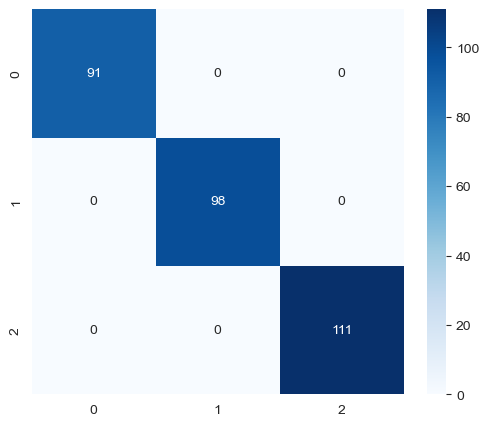

In [38]:
# 绘制真实值与预测值的热力图
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_true,classes),annot=True,cmap='Blues',fmt='g')

> 由热力图可以看出：每个预测均正确

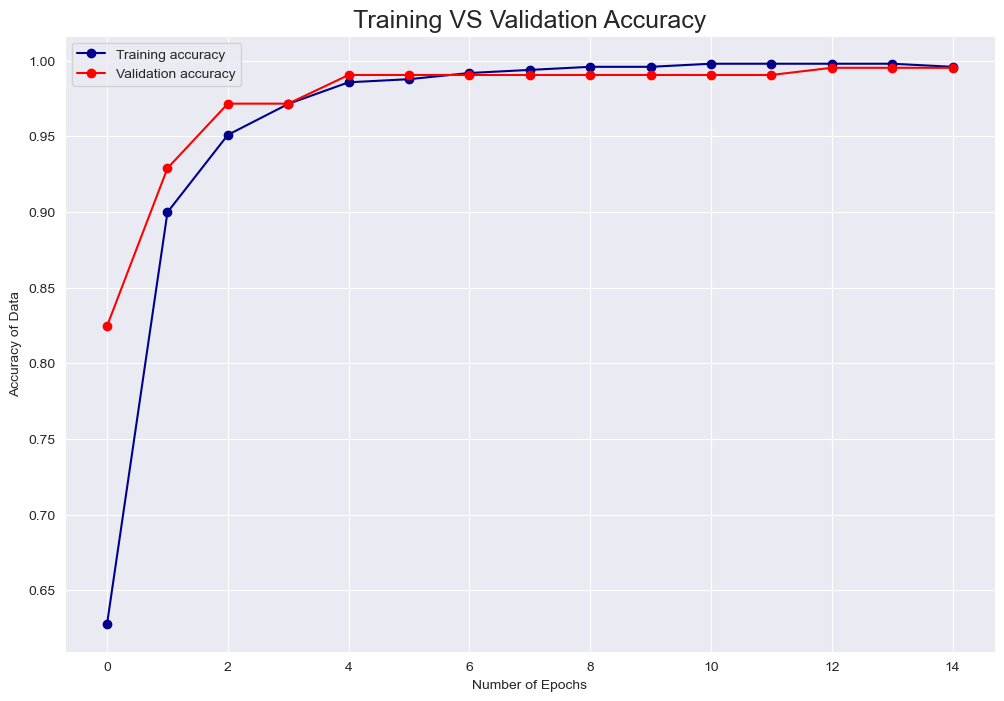

In [39]:
# 绘制图标：训练准确性，验证准确性与迭代次数之间的关系
plt.figure(figsize=(12,8))
# 迭代次数
plt.xlabel('Number of Epochs')
# 准确性
plt.ylabel('Accuracy of Data')
plt.plot(history.history['accuracy'],label='Training accuracy', marker='o',color='darkblue')
plt.plot(history.history['val_accuracy'],label ='Validation accuracy',marker='o',color='r')
plt.title("Training VS Validation Accuracy", fontsize = 18)
plt.legend()

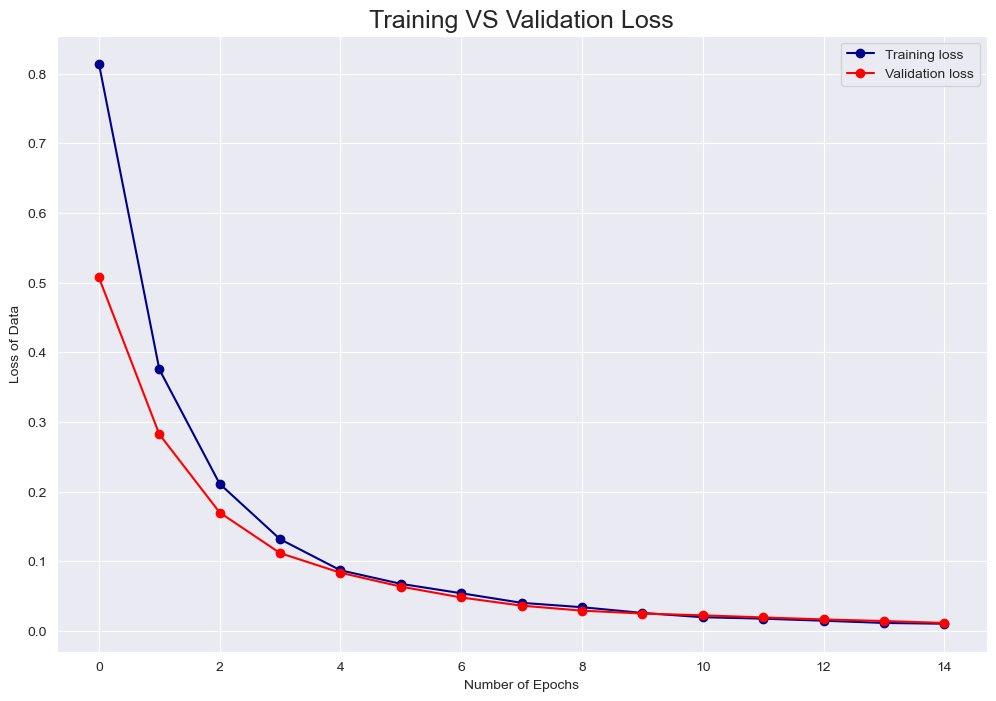

In [40]:
# 绘制损失数据
plt.figure(figsize=(12,8))
# 迭代次数
plt.xlabel('Number of Epochs')
# 损失度
plt.ylabel('Loss of Data')
plt.plot(history.history['loss'],label='Training loss', marker='o',color='darkblue')
plt.plot(history.history['val_loss'],label ='Validation loss',marker='o',color='r')
plt.title("Training VS Validation Loss", fontsize = 18)
plt.legend()

In [33]:
from ann_visualizer.visualize import ann_viz

ann_viz(model, view = True,filename="ann")


## KNN算法

In [41]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [108]:
x = df.drop(columns=['Level'])
y = df['Level']

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [110]:
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [112]:
params = {
   "n_neighbors": [i for i in range(3,100) if i % 2 != 0]
}

In [113]:
estimator = KNeighborsClassifier()
estimator = GridSearchCV(estimator=estimator, param_grid=params)
estimator.fit(x_train,y_train)
score = estimator.score(x_test,y_test)
score

1.0

In [114]:
y_predict = estimator.predict(x_test)

<AxesSubplot: >

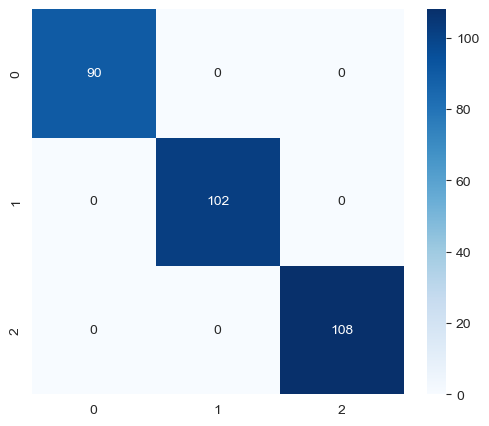

In [115]:
# 绘制真实值与预测值之间的关系
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Blues',fmt='g')

In [116]:
params_n = estimator.cv_results_['param_n_neighbors'].data

In [117]:
scores = estimator.cv_results_['mean_test_score']

<function matplotlib.pyplot.legend(*args, **kwargs)>

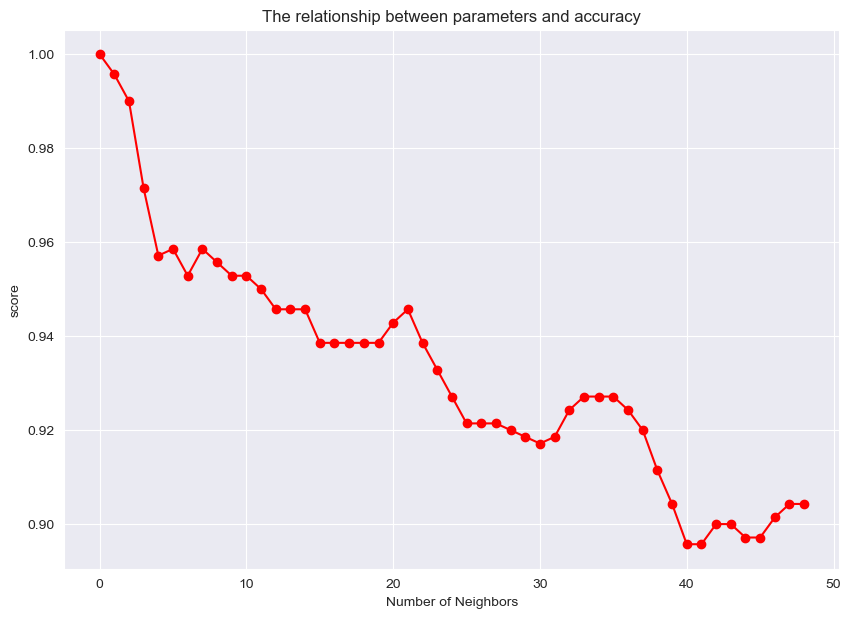

In [118]:
# 参数与准确率的关系
plt.figure(figsize=(10,7))
plt.xlabel('Number of Neighbors')
plt.ylabel('score')
plt.plot(scores,marker='o',color='r')
plt.title("The relationship between parameters and accuracy")
plt.legend

## 随机森林

In [71]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [119]:
x = df.drop(columns=['Level'])
y = df['Level']

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [121]:
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
params = {
    "n_estimators": [i for i in range(50,100) if i % 5 == 0],
    "oob_score":[True]
}

In [124]:
estimator = RandomForestClassifier()
estimator = GridSearchCV(estimator=estimator,param_grid=params)
estimator.fit(x_train,y_train)
score = estimator.score(x_test,y_test)
score

1.0

In [125]:
estimator.cv_results_

{'mean_fit_time': array([1.22653556, 0.4590508 , 0.4169117 , 1.47930384, 1.23260541,
        1.8089026 , 0.73598804, 1.1026082 , 0.54405713, 0.51253667]),
 'std_fit_time': array([0.60805046, 0.19441856, 0.1677309 , 0.6668553 , 0.36085369,
        1.31918774, 0.33275208, 0.59741422, 0.18268876, 0.07834741]),
 'mean_score_time': array([0.07087779, 0.01415887, 0.02353654, 0.19609675, 0.05797887,
        0.04627008, 0.06226377, 0.05803833, 0.02692704, 0.03612661]),
 'std_score_time': array([0.03569312, 0.00540154, 0.01117097, 0.20402827, 0.01765961,
        0.01808022, 0.05949531, 0.04532316, 0.00538913, 0.01481884]),
 'param_n_estimators': masked_array(data=[50, 55, 60, 65, 70, 75, 80, 85, 90, 95],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_oob_score': masked_array(data=[True, True, True, True, True, True, True, True, True,
                    True],
            

In [91]:
y_predict = estimator.predict(x_test)

<AxesSubplot: >

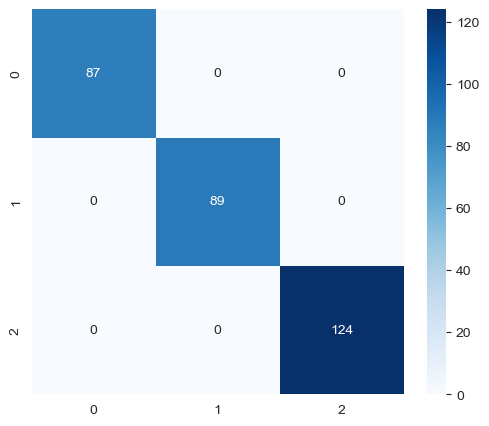

In [92]:
# 绘制真实值与预测值之间的关系
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap="Blues",fmt='g')

In [93]:
estimator.cv_results_

{'mean_fit_time': array([0.56576691, 0.22396865, 0.15669465, 0.1722527 , 0.18152776,
        0.20741992, 0.21532679, 0.23607974, 0.34207468, 0.41538787]),
 'std_fit_time': array([0.43448789, 0.03397918, 0.0086148 , 0.00647786, 0.01293014,
        0.01472568, 0.00901749, 0.03309268, 0.14206611, 0.18221944]),
 'mean_score_time': array([0.01576929, 0.01655612, 0.00977268, 0.01036124, 0.01448369,
        0.01246061, 0.01395507, 0.01535602, 0.02332559, 0.02517018]),
 'std_score_time': array([0.00738175, 0.00474528, 0.00116175, 0.00163378, 0.0040456 ,
        0.00209017, 0.00227331, 0.00256555, 0.00616659, 0.01593004]),
 'param_n_estimators': masked_array(data=[50, 55, 60, 65, 70, 75, 80, 85, 90, 95],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_oob_score': masked_array(data=[True, True, True, True, True, True, True, True, True,
                    True],
            

## 朴素贝叶斯算法

In [97]:
x = df.drop(columns=['Level'])
y = df['Level']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [95]:
from sklearn.naive_bayes import GaussianNB

In [98]:
estimator = GaussianNB()
estimator.fit(x_train,y_train)
estimator.score(x_test,y_test)

0.8866666666666667

In [105]:
y_predict = estimator.predict(x_test)

<AxesSubplot: >

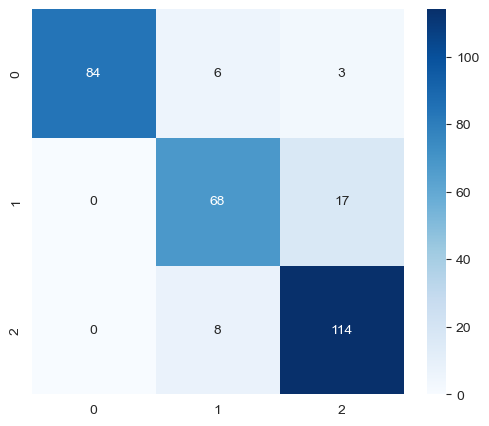

In [106]:
# 绘制真实值与预测值之间的关系
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap="Blues",fmt='g')

## 算法评估

|     算法名      |        训练时间        |        预测时间         |  精确度  |
|:------------:|:------------------:|:-------------------:|:-----:|
|     KNN      | 5.326892852783203 | 0.17852234840393066 | 100%  |
|     随机森林     | 0.4733254909515381 | 0.4733254909515381  | 100%  |
|    朴素贝叶斯     | 0.0079770088195801 | 0.0039911270141602  | 88.7% |
| Sequential 顺序模型 | 5.521180152893066  | 0.45949578285217285 | 100%  |